In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

**Importing Dataset**

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

**One Hot Encoding "Geography" (3 classes)**

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

**Label Encoding "Gender"**

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 4] = le.fit_transform(x[:, 4])

**Splitting Dataset**

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 1)

**Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

**Building ANN**

In [7]:
model = tf.keras.models.Sequential()      # initialize ann
model.add(tf.keras.layers.Dense(units=6, activation='relu'))      # input and 1st hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))      # 2nd hidden layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))   # output layer

**Compiling ANN**

In [8]:
model.compile(optimizer='adam' ,loss='binary_crossentropy', metrics=['accuracy'])

**Training ANN**

In [9]:
model.fit(xTrain, yTrain, batch_size=32, epochs=100)
model.summary()

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6927
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7999
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8064
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8159
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8273
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8375
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8451
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8497
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8526
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3542 - accura

In [10]:
model.evaluate(xTest, yTest)

63/63 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8630


[0.3341400623321533, 0.8629999756813049]

**Confusion Matrix**

63/63 [==============================] - 0s 967us/step


Text(33.0, 0.5, 'True label')

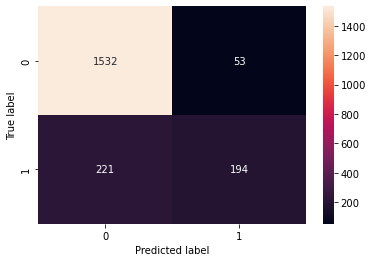

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
predictions = model.predict(xTest)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

cm = confusion_matrix(yTest, predictions)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.79      0.47      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

